Baseline for Friedman's test: 0.0028775049690802613


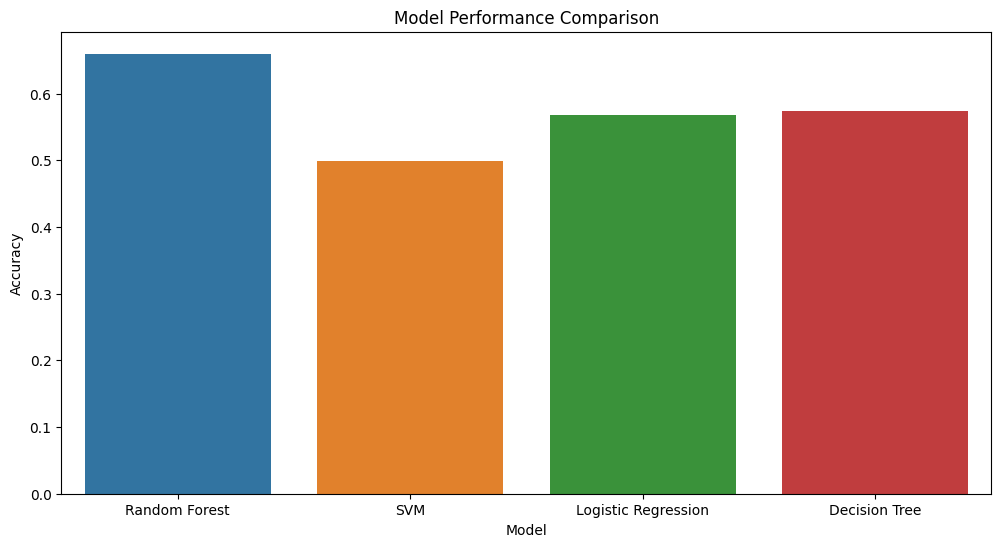

Best Models: [['Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree']]


<ipython-input-19-edd74bec20d0>:56: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  best_models = df_results.columns[reject_mask.any(axis=0)].tolist()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings

data = pd.read_csv('wineq.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),

]

warnings.filterwarnings("ignore", category=ConvergenceWarning)

results = {}
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores

# Perform Friedman's test
_, base_line = friedmanchisquare(*results.values())
print(f"Baseline for Friedman's test: {base_line}")

# Perform Post-hoc Bonferroni-Dunn test
df_results = pd.DataFrame(results)
df_long = pd.melt(df_results, var_name='Model', value_name='Accuracy')


posthoc = pairwise_tukeyhsd(df_long['Accuracy'], df_long['Model'], alpha=0.05)


plt.figure(figsize=(12, 6))
sns.barplot(data=df_results.mean().reset_index(), x='index', y=0)
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

reject_mask = posthoc.reject
best_models = df_results.columns[reject_mask.any(axis=0)].tolist()
print("Best Models:", best_models)
